In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
import geopandas as gpd
import pysal as ps
#from pysal.contrib.viz import mapping as maps
import shapefile
import pandas as pd
from shapely.geometry import shape
import numpy as np

In [17]:
myshp = open("/Users/atmyers/Downloads/San_Francisco_Bay_Region_2020_Census_Tracts/region_2020_censustract.shp","rb")
mydbf = open("/Users/atmyers/Downloads/San_Francisco_Bay_Region_2020_Census_Tracts/region_2020_censustract.dbf", "rb")
myprj = open("/Users/atmyers/Downloads/San_Francisco_Bay_Region_2020_Census_Tracts/region_2020_censustract.prj", "rb")

In [18]:
r = shapefile.Reader(shp=myshp, dbf=mydbf, prj=myprj)
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
for row in r.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record)))  

In [19]:
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)

In [20]:
gdf['fips'] = gdf['statefp'] + gdf['countyfp']

In [21]:
gdf['fips'] = gdf['fips'].astype(int)

In [22]:
df000 = pd.read_csv("BayArea.csv", header=None, names=["fips", "tot"], dtype={'fips':int, 'tot':float})

In [23]:
gdf000 = gdf.merge(df000, left_on='fips', right_on='fips', how='inner')

In [24]:
gdf000 = gdf000[gdf000['name_'] != "9804.01"]

In [ ]:
gdf

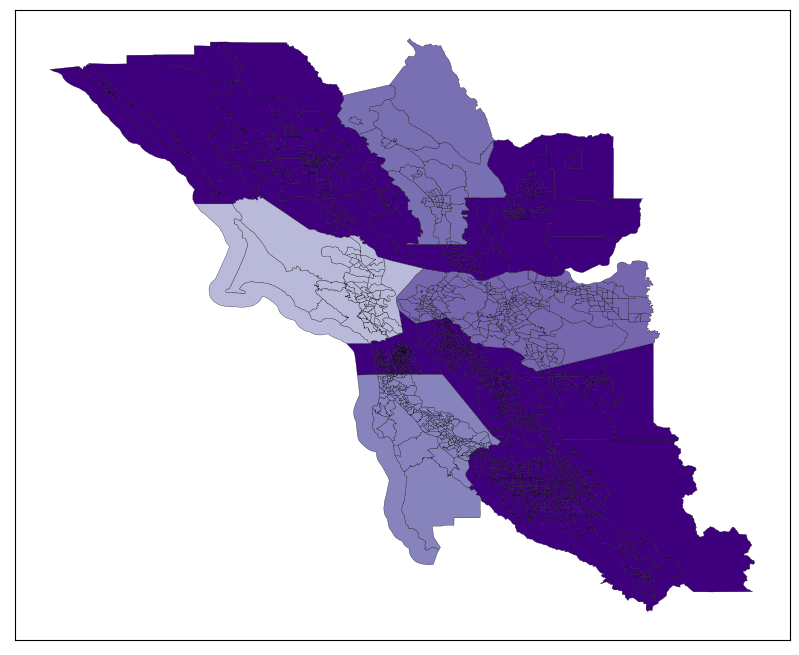

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(aspect='equal', xticks=[], yticks=[])
gdf000.plot(column= 'tot', ax = ax, cmap='Purples', edgecolor="black", linewidth=0.2, legend=False, vmin=0, vmax=50000)
fig.savefig("bay_area_wastewater_k_levels")

In [14]:
plt.savefig("bay_area")

<Figure size 640x480 with 0 Axes>